In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [3]:
df=pd.read_csv('./EEG_data.csv')
data = pd.read_csv('./demographic_info.csv')

In [4]:
data = data.rename(columns = {'subject ID': 'SubjectID',' gender':'gender',' age':'age',' ethnicity':'ethnicity'})
df = df.merge(data,how = 'inner',on = 'SubjectID')
df.head()

,SubjectID,VideoID,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,predefinedlabel,user-definedlabeln,age,ethnicity,gender
0,0.0,0.0,56.0,43.0,278.0,301963.0,90612.0,33735.0,23991.0,27946.0,45097.0,33228.0,8293.0,0.0,0.0,25,Han Chinese,M
1,0.0,0.0,40.0,35.0,-50.0,73787.0,28083.0,1439.0,2240.0,2746.0,3687.0,5293.0,2740.0,0.0,0.0,25,Han Chinese,M
2,0.0,0.0,47.0,48.0,101.0,758353.0,383745.0,201999.0,62107.0,36293.0,130536.0,57243.0,25354.0,0.0,0.0,25,Han Chinese,M
3,0.0,0.0,47.0,57.0,-5.0,2012240.0,129350.0,61236.0,17084.0,11488.0,62462.0,49960.0,33932.0,0.0,0.0,25,Han Chinese,M
4,0.0,0.0,44.0,53.0,-8.0,1005145.0,354328.0,37102.0,88881.0,45307.0,99603.0,44790.0,29749.0,0.0,0.0,25,Han Chinese,M


In [5]:
df.shape

(12811, 18)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12811 entries, 0 to 12810
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   SubjectID           12811 non-null  float64
 1   VideoID             12811 non-null  float64
 2   Attention           12811 non-null  float64
 3   Mediation           12811 non-null  float64
 4   Raw                 12811 non-null  float64
 5   Delta               12811 non-null  float64
 6   Theta               12811 non-null  float64
 7   Alpha1              12811 non-null  float64
 8   Alpha2              12811 non-null  float64
 9   Beta1               12811 non-null  float64
 10  Beta2               12811 non-null  float64
 11  Gamma1              12811 non-null  float64
 12  Gamma2              12811 non-null  float64
 13  predefinedlabel     12811 non-null  float64
 14  user-definedlabeln  12811 non-null  float64
 15  age                 12811 non-null  int64  
 16  ethn

In [7]:
df.columns

Index(['SubjectID', 'VideoID', 'Attention', 'Mediation', 'Raw', 'Delta',
       'Theta', 'Alpha1', 'Alpha2', 'Beta1', 'Beta2', 'Gamma1', 'Gamma2',
       'predefinedlabel', 'user-definedlabeln', 'age', 'ethnicity', 'gender'],
      dtype='object')

In [8]:
df['gender']=df['gender'].replace({'M':1,'F':0})
df['ethnicity']=df['ethnicity'].replace({'Han Chinese':0,'Bengali':1,'English':2})
df.drop(columns = ['SubjectID','VideoID','predefinedlabel'],inplace=True)

/tmp/ipykernel_29618/2564822645.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['gender']=df['gender'].replace({'M':1,'F':0})
/tmp/ipykernel_29618/2564822645.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['ethnicity']=df['ethnicity'].replace({'Han Chinese':0,'Bengali':1,'English':2})


In [9]:
df.columns

Index(['Attention', 'Mediation', 'Raw', 'Delta', 'Theta', 'Alpha1', 'Alpha2',
       'Beta1', 'Beta2', 'Gamma1', 'Gamma2', 'user-definedlabeln', 'age',
       'ethnicity', 'gender'],
      dtype='object')

In [10]:
df.shape

(12811, 15)

this is for checking null value

In [11]:
for col in df.columns:
    if(df[col].isnull().sum()>0):
        print(col)

In [12]:
top_fea=df.drop(['user-definedlabeln'],axis=1)
top_fea.head()

,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,age,ethnicity,gender
0,56.0,43.0,278.0,301963.0,90612.0,33735.0,23991.0,27946.0,45097.0,33228.0,8293.0,25,0,1
1,40.0,35.0,-50.0,73787.0,28083.0,1439.0,2240.0,2746.0,3687.0,5293.0,2740.0,25,0,1
2,47.0,48.0,101.0,758353.0,383745.0,201999.0,62107.0,36293.0,130536.0,57243.0,25354.0,25,0,1
3,47.0,57.0,-5.0,2012240.0,129350.0,61236.0,17084.0,11488.0,62462.0,49960.0,33932.0,25,0,1
4,44.0,53.0,-8.0,1005145.0,354328.0,37102.0,88881.0,45307.0,99603.0,44790.0,29749.0,25,0,1


In [13]:
scaler = StandardScaler()
X=scaler.fit_transform(top_fea)
X

array([[ 0.63433386, -0.1846232 ,  0.35529362, ..., -0.18591779,
        -0.47031213,  0.50156067],
       [-0.05674966, -0.5377447 , -0.19329521, ..., -0.18591779,
        -0.47031213,  0.50156067],
       [ 0.24559938,  0.03607774,  0.05925636, ..., -0.18591779,
        -0.47031213,  0.50156067],
       ...,
       [ 0.80710475, -0.80258582, -0.82216533, ..., -0.63941983,
        -0.47031213, -1.99377673],
       [ 0.80710475, -0.80258582, -0.25016112, ..., -0.63941983,
        -0.47031213, -1.99377673],
       [ 0.97987563, -0.80258582, -0.19162268, ..., -0.63941983,
        -0.47031213, -1.99377673]])

In [14]:
X.shape

(12811, 14)

In [15]:
from sklearn.model_selection import train_test_split
y=df['user-definedlabeln']
X_train,x_test,Y_train,y_test=train_test_split(X,y,random_state=108,test_size=0.27)

In [16]:
X_train.shape[1]

14

## Using SVM for classification

In [17]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [18]:
# Create an SVM classifier
svm_classifier = SVC(random_state=108)

# Train the classifier on the training data
svm_classifier.fit(X_train, Y_train)

SVC(random_state=108)

In [19]:
# Make predictions on the test data
predictions = svm_classifier.predict(x_test).astype(int)
predictions

array([0, 1, 1, ..., 0, 0, 0])

In [20]:
accuracy = accuracy_score(y_test, predictions)
accuracy

0.66493206128939

In [21]:
from sklearn.metrics import classification_report,confusion_matrix

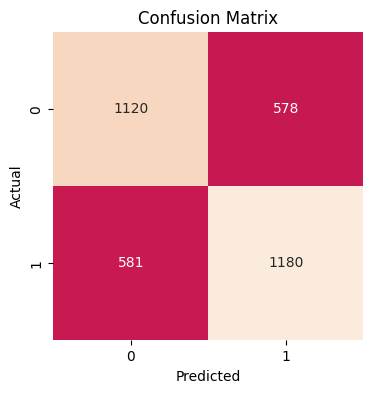

In [22]:
cm = confusion_matrix(y_test, predictions)

plt.figure(figsize=(4, 4))

sns.heatmap(cm, annot=True, fmt='g', vmin=0, cbar=False)

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")

plt.show()

## Using tenserflow keras 

In [23]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import callbacks,layers

2024-11-02 16:54:19.096210: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-02 16:54:19.240010: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-02 16:54:19.369345: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1730566459.526213   29618 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1730566459.574913   29618 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-02 16:54:19.900415: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

In [25]:
inputs = tf.keras.Input(shape=(X_train.shape[1],))
x = tf.keras.layers.Dense(256, activation='relu')(inputs)
x = tf.keras.layers.Dense(256, activation='relu')(x)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)

model=tf.keras.Model(inputs,outputs)
model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy',tf.keras.metrics.AUC(name='auc')]
             )
batch_size=32
epochs=50
history=model.fit(
            X_train,
            Y_train,
            validation_split=0.2,
            batch_size=batch_size,
            epochs=epochs,
            callbacks=[tf.keras.callbacks.ReduceLROnPlateau()]
)

Epoch 1/50


2024-11-02 16:59:24.916329: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


234/234 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6016 - auc: 0.6361 - loss: 0.6635 - val_accuracy: 0.6152 - val_auc: 0.6617 - val_loss: 0.6537 - learning_rate: 0.0010
Epoch 2/50
234/234 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6344 - auc: 0.6943 - loss: 0.6303 - val_accuracy: 0.6360 - val_auc: 0.6871 - val_loss: 0.6414 - learning_rate: 0.0010
Epoch 3/50
234/234 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6505 - auc: 0.7066 - loss: 0.6232 - val_accuracy: 0.6542 - val_auc: 0.7041 - val_loss: 0.6292 - learning_rate: 0.0010
Epoch 4/50
234/234 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6523 - auc: 0.7158 - loss: 0.6156 - val_accuracy: 0.6569 - val_auc: 0.7131 - val_loss: 0.6198 - learning_rate: 0.0010
Epoch 5/50
234/234 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6531 - auc: 0.7177 - loss: 0.6129 - val_accuracy: 0.6574 - val_auc: 0.7090 - val_loss: 0.6234 - learning_rate: 0.0010
Epoch 6/50
234/234 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6604 - auc: 0.7288 - loss

In [26]:
model.evaluate(x_test,y_test)

109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6655 - auc: 0.7360 - loss: 0.6244


[0.6200885772705078, 0.6750506162643433, 0.7419554591178894]

In [28]:
y_true = np.array(y_test)

y_pred = np.squeeze(model.predict(x_test))
y_pred = np.array(y_pred >=0.5, dtype=np.int64)
y_pred

109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([0, 0, 1, ..., 0, 1, 0])

In [29]:
accuracyKeras=accuracy_score(y_true, y_pred)
accuracyKeras

0.6750505926568372

In [30]:
report = classification_report(y_true, y_pred)
print(report)

              precision    recall  f1-score   support

         0.0       0.66      0.68      0.67      1698
         1.0       0.69      0.67      0.68      1761

    accuracy                           0.68      3459
   macro avg       0.68      0.68      0.68      3459
weighted avg       0.68      0.68      0.68      3459



## Using only EEG signal for classification

In [31]:
top_fea=df[['Delta','Theta','Alpha1','Alpha2','Beta1','Beta2','Gamma1','Gamma2']]

In [32]:
scaler = StandardScaler()
X=scaler.fit_transform(top_fea)

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
y=df['user-definedlabeln']

In [35]:
X_train,x_test,Y_train,y_test=train_test_split(X,y,random_state=108,test_size=0.27)

In [36]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [37]:
svm_classifier = SVC(random_state=108)
svm_classifier.fit(X_train, Y_train)

SVC(random_state=108)

In [38]:
predictions = svm_classifier.predict(x_test).astype(int)
predictions

array([0, 0, 1, ..., 0, 0, 0])

In [39]:
accuracy = accuracy_score(y_test, predictions)
accuracy

0.6001734605377277

### Trying to use best correlated features for classification filter method

<Axes: title={'center': 'Correlation with Target'}>

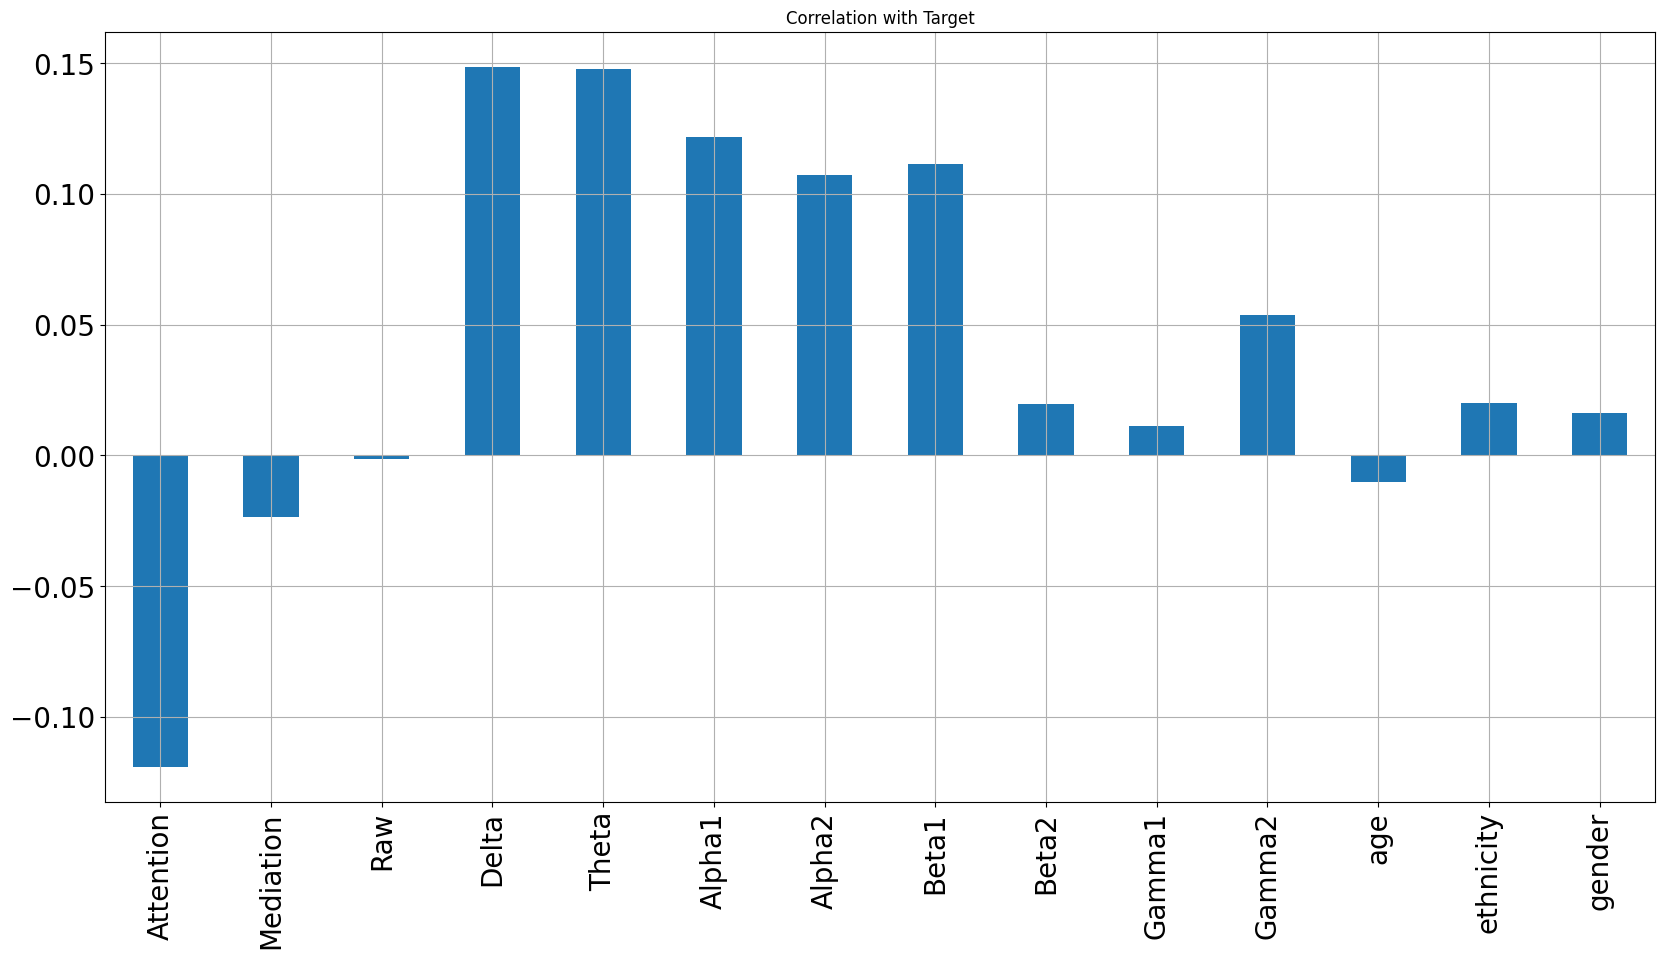

In [40]:
feature=df.drop(['user-definedlabeln'],axis=1)
feature.corrwith(df['user-definedlabeln']).plot.bar(
        figsize = (20, 10), title = "Correlation with Target", fontsize = 20,
        rot = 90, grid = True)

In [41]:
top_fea=df[['Attention','Delta','Theta','Alpha1','Alpha2','Beta1','Gamma2']]

In [42]:
top_fea.head()

,Attention,Delta,Theta,Alpha1,Alpha2,Beta1,Gamma2
0,56.0,301963.0,90612.0,33735.0,23991.0,27946.0,8293.0
1,40.0,73787.0,28083.0,1439.0,2240.0,2746.0,2740.0
2,47.0,758353.0,383745.0,201999.0,62107.0,36293.0,25354.0
3,47.0,2012240.0,129350.0,61236.0,17084.0,11488.0,33932.0
4,44.0,1005145.0,354328.0,37102.0,88881.0,45307.0,29749.0


In [43]:
y=df['user-definedlabeln']

In [44]:
X_train,x_test,Y_train,y_test=train_test_split(top_fea,y,random_state=108,test_size=0.27)

In [45]:
svm_classifier = SVC(random_state=108)
svm_classifier.fit(X_train, Y_train)

SVC(random_state=108)

In [46]:
predictions = svm_classifier.predict(x_test).astype(int)
predictions

array([0, 0, 1, ..., 0, 0, 0])

In [47]:
accuracy = accuracy_score(y_test, predictions)
accuracy

0.5900549291702805